In [1]:
!pip install clean-text

In [3]:
import tweepy

In [4]:
import re
import unicodedata
import string

In [5]:
from cleantext import clean

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [7]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#Create your own keys on Twitter Developer
API_KEY = 'hGwC17TsW1W99swjFCXPwi5i9'
API_SECRET = 'KmgC8oGcs7uvl9B7HDMi8KUUSAzsTPOPr3vHVt9XJOiks7C5Lw'
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAFqzcgEAAAAAh%2BilS8IkEYr68z%2BPlwkAGa0CAys%3Du3jZnN5YlQE3OS1hZUEq942I1fQ0kbriuNfuUyla7IqJKqL6CF'
ACCESS_TOKEN = '1519454932876808194-D8CTAAIZuvBdrqWuPecRSNX1p0S3cf'
ACCESS_TOKEN_SECRET = 'pUZatEZVOuTqBdFaBFAvts9A3hj3y7PvLaLKTpSIxUac9'

CLIENT_ID = 'UXJWX3BWbUpqRUdQSjNxeFVzb1c6MTpjaQ'
CLIENT_SECRET = 'V6enZ5OHrb8rjZ-75TfsUCOGy6Xse_kuISE7-jbdmEPnjS8vx4'
REDIRECT_URI = 'https://data-api.twitter.com/insights/engagement' 

In [47]:
client = tweepy.Client(bearer_token=BEARER_TOKEN)

In [10]:
query = 'Lula ladrao OR Bolsonaro gado -is:retweet'

In [11]:
response = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['created_at', 'public_metrics'], expansions=['author_id'])

In [12]:
tweets = [tweet for tweet in response.data] 

In [13]:
#Here I prepare an .txt that will append the 100 responses
save_tweets = open('Tweets.txt', 'a')

for tweet in tweets:
    first_line = str(tweet['author_id']) + " " + tweet['text'] + "\n"     
    save_tweets.write(first_line)
    second_line = "retweet_count: " +  str(tweet.public_metrics['retweet_count']) + ", " + "reply_count: " + str(tweet.public_metrics['reply_count']) + ", " + "like_count: " + str(tweet.public_metrics['like_count']) + ", " + "quote_count: " + str(tweet.public_metrics['quote_count']) + "\n"
    save_tweets.write(second_line)
save_tweets.close()

In [9]:
#Here I read the .txt file and separate them in the text of the tweet and the public metrics
read_tweets = open('Tweets.txt', 'r')
user_tweets = []
public_metrics = []
read = read_tweets.read().split('\n')

word = ''
for i in read:
    if i.find('retweet_count: ') != -1:
        public_metrics.append(i)
        user_tweets.append(word)
        word = ''
        continue        
    word += i 

read_tweets.close()
print(user_tweets[:10])
print(len(public_metrics))

['1530301549041295360 @AtilaGPRGPR @diefoduarte7483 @jairbolsonaro Não fundamentada? Kkkk Coisas que nem o bolsonaro nega mas o gado simVcs são deploráveis', '966422258687315971 RT @LuizCor24841840: 93 mortos, 26 desaparecidos e 6 mil desabrigados e o prefeito de Recife em São Paulo em reuniões da campanha de Lula l…', '1236086201838419968 @DaniloGentili Eu duvido q tenha ladrão maior que Lula e vcs aí nessa ladainha sem fim !!', '1278549436545851392 RT @RCNradiochatnet: O Lula falou! "A profissão mais honesta é a do POLÍTICO, sabe porque? ...por mais ladrão que ele seja, ele tem que ir…', '4821431243 RT @LuizCor24841840: 93 mortos, 26 desaparecidos e 6 mil desabrigados e o prefeito de Recife em São Paulo em reuniões da campanha de Lula l…', '35562670 RT @LuizCor24841840: 93 mortos, 26 desaparecidos e 6 mil desabrigados e o prefeito de Recife em São Paulo em reuniões da campanha de Lula l…', '1196172031718576130 RT @LuizCor24841840: 93 mortos, 26 desaparecidos e 6 mil desabrigados e o 

In [10]:
#Here I remove the duplicated tweets
lenght = len(user_tweets)-1
i = 0
        
while i < lenght:    
    if user_tweets.count(user_tweets[i]) > 1:
        user_tweets.pop(i)
        public_metrics.pop(i)
        lenght -= 1
    i += 1 
    
print(len(user_tweets), len(public_metrics))

767 767


In [11]:
def remove_urls(lista_tweets):
    novos_tweets = []

    for tweet in lista_tweets:
        texto = re.sub(r"http\S+", "", tweet)
        novos_tweets.append(texto)

    return novos_tweets

def remove_usuario(lista_tweets):
    novos_tweets = []

    for tweet in lista_tweets:
        texto = re.sub(r"@\S+", "", tweet)
        novos_tweets.append(texto)

    return novos_tweets

def remove_hashtag(lista_tweets):
    novos_tweets = []

    for tweet in lista_tweets:
        texto = re.sub(r"#\S+", "", tweet)
        novos_tweets.append(texto)

    return novos_tweets

# nova_lista = [w for word in words for w in word if w not in stop_words] brincando com python
def remove_stopwords(lista_tweets):
    words = [word_tokenize(w) for w in lista_tweets]
    stop_words = set(stopwords.words("portuguese"))
    nova_lista = []
    
    for word in words:
        tweets = []
        for w in word:
            if w not in stop_words:
                tweets.append(w)
        nova_lista.append(tweets)                
        
    return nova_lista

#Remove os emojis e acentuações
def remove_emojis(lista_tweets):
    nova_lista = []
    for i in lista_tweets:
        tweets = []
        tweets.append(clean(str(i), lower=False, no_punct=True, no_emoji=True))
        nova_lista.append(tweets)
    return nova_lista

def remove_empty_spaces(lista_tweets):
    nova_lista = [lista_tweets[i][0].split(" ") for i in range(len(lista_tweets)-1)]
            
    return nova_lista

def remove_ids(lista_tweets):
    nova_lista = [t[1:] for t in lista_tweets]
    return nova_lista

In [12]:
new_tweets = remove_urls(user_tweets)
new_tweets = remove_usuario(new_tweets)
new_tweets = remove_hashtag(new_tweets)
new_tweets = remove_stopwords(new_tweets)
new_tweets = remove_emojis(new_tweets)
new_tweets = remove_empty_spaces(new_tweets)
new_tweets = remove_ids(new_tweets)

print(len(new_tweets), new_tweets[:10])

766 [['Nao', 'fundamentada', 'Kkkk', 'Coisas', 'bolsonaro', 'nega', 'gado', 'simVcs', 'deploraveis'], ['RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], ['Eu', 'duvido', 'q', 'ladrao', 'maior', 'Lula', 'vcs', 'ai', 'nessa', 'ladainha', 'fim'], ['RT', 'O', 'Lula', 'falou', 'A', 'profissao', 'honesta', 'POLITICO', 'sabe', 'porque', 'ladrao', 'ir'], ['RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], ['RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], ['RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], ['Mais', 'menininha', 'criado', 'papai', 'vota', 'Lula', 'ladrao'], ['RT', 'Este', 'mes', 'Saturno', '

In [13]:
def randomFeatures(tweets):
    data = []
    for t in tweets:
        feature = np.random.randint(2)
        if(feature == 1):
            data.append((t, 'yes'))
        else:
            data.append((t, 'no'))        
    return data
document_test = randomFeatures(new_tweets)
print(document_test[:10])

[(['Nao', 'fundamentada', 'Kkkk', 'Coisas', 'bolsonaro', 'nega', 'gado', 'simVcs', 'deploraveis'], 'no'), (['RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], 'yes'), (['Eu', 'duvido', 'q', 'ladrao', 'maior', 'Lula', 'vcs', 'ai', 'nessa', 'ladainha', 'fim'], 'no'), (['RT', 'O', 'Lula', 'falou', 'A', 'profissao', 'honesta', 'POLITICO', 'sabe', 'porque', 'ladrao', 'ir'], 'no'), (['RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], 'yes'), (['RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], 'no'), (['RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], 'no'), (['Mais', 'menininha', 'criado', 'papai', 'vota'

In [14]:
#Here I'm formating the training data from .txt file
training_data = open('treinamento.txt', 'r').read().split("\n")
documents = []
words = []

#The last element is a empty string
for i in training_data[:len(training_data)-2]:
    feature = ''
    tweet = ''
    count_point = 0
    index = 0
    for j in i:
        if j == ';':
            count_point += 1
            
        if count_point < 1:
            feature += j
        if count_point > 1 and j == ";":
            tweet = i[index+2:len(i)-1].split(" ")
            words.append(i[index+2:len(i)-1])
            continue
        index += 1
    documents.append(([t.lower() for t in tweet], feature))
    

print(len(documents), documents[:2], words[0])

1032 [(['votaram', 'no', 'pezao', 'agora', 'tomem', 'no', 'czao'], 'yes'), (['cuidado', 'com', 'a', 'poupanca', 'pessoal', 'lembram', 'o', 'que', 'aconteceu', 'na', 'epoca', 'do', 'collor', 'ne'], 'no')] Votaram no PEZAO Agora tomem no CZAO


In [15]:
#Here I build words with no stopwords
words_without_stopwords = remove_stopwords(words)  

print(words_without_stopwords[0])

['Votaram', 'PEZAO', 'Agora', 'tomem', 'CZAO']


In [16]:
#Here I'm creating the list of Freq for each word - training set
all_words = []
for i in words_without_stopwords:
    for j in i:
        all_words.append(j.lower())

freq_words = nltk.FreqDist(all_words)
print(freq_words.most_common(15))

[('nao', 295), ('vai', 99), ('so', 91), ('e', 89), ('o', 83), ('pra', 81), ('ja', 68), ('sao', 58), ('a', 56), ('brasil', 55), ('ser', 47), ('ta', 47), ('carne', 39), ('melhor', 39), ('cara', 35)]


In [17]:
#Here I'm creating the list of Freq for each word - testing set
all_words_test = []
for i in new_tweets:
    for j in i:
        all_words_test.append(j.lower())

freq_words_test = nltk.FreqDist(all_words_test)
print(freq_words_test.most_common(15))

[('ladrao', 653), ('lula', 635), ('rt', 291), ('o', 182), ('bolsonaro', 170), ('e', 117), ('gado', 83), ('pra', 83), ('a', 70), ('vai', 70), ('q', 57), ('nao', 55), ('um', 55), ('maior', 51), ('vc', 51)]


In [18]:
word_feature = list(freq_words.keys())[:3000]
word_feature_test = list(freq_words_test.keys())

def find_features(document):
    words = set(document)
    features = {}
    for w in word_feature:
        #the key is the word in the 3000 most popular words
        #is gonna be the boolean value for w in words
        features[w] = (w in words)
        
    return features

def find_features_test(document):
    words = set(document)
    features = {}
    for w in word_feature_test:
        features[w] = (w in words)
        
    return features

print(find_features_test(all_words_test))

{'nao': True, 'fundamentada': True, 'kkkk': True, 'coisas': True, 'bolsonaro': True, 'nega': True, 'gado': True, 'simvcs': True, 'deploraveis': True, 'rt': True, '93': True, 'mortos': True, '26': True, 'desaparecidos': True, '6': True, 'mil': True, 'desabrigados': True, 'prefeito': True, 'recife': True, 'sao': True, 'paulo': True, 'reunioes': True, 'campanha': True, 'lula': True, 'l': True, 'eu': True, 'duvido': True, 'q': True, 'ladrao': True, 'maior': True, 'vcs': True, 'ai': True, 'nessa': True, 'ladainha': True, 'fim': True, 'o': True, 'falou': True, 'a': True, 'profissao': True, 'honesta': True, 'politico': True, 'sabe': True, 'porque': True, 'ir': True, 'mais': True, 'menininha': True, 'criado': True, 'papai': True, 'vota': True, 'este': True, 'mes': True, 'saturno': True, 'marte': True, 'venus': True, 'jupiter': True, 'alinhados': True, 'ceu': True, 'oque': True, 'significa': True, 'que': True, 'e': True, 'uol': True, 'urubu': True, 'olho': True, 'azar': True, 'pra': True, 'cem'

In [16]:
print(documents[0])

(['votaram', 'no', 'pezao', 'agora', 'tomem', 'no', 'czao'], 'yes')


In [19]:
feature_sets = [(find_features(rev), category) for (rev, category) in documents]

In [20]:
feature_sets_test = [(find_features_test(rev), category) for (rev, category) in document_test]

In [21]:
training_set = feature_sets
test_set = feature_sets_test

In [22]:
print(test_set[0])

({'nao': False, 'fundamentada': True, 'kkkk': False, 'coisas': False, 'bolsonaro': True, 'nega': True, 'gado': True, 'simvcs': False, 'deploraveis': True, 'rt': False, '93': False, 'mortos': False, '26': False, 'desaparecidos': False, '6': False, 'mil': False, 'desabrigados': False, 'prefeito': False, 'recife': False, 'sao': False, 'paulo': False, 'reunioes': False, 'campanha': False, 'lula': False, 'l': False, 'eu': False, 'duvido': False, 'q': False, 'ladrao': False, 'maior': False, 'vcs': False, 'ai': False, 'nessa': False, 'ladainha': False, 'fim': False, 'o': False, 'falou': False, 'a': False, 'profissao': False, 'honesta': False, 'politico': False, 'sabe': False, 'porque': False, 'ir': False, 'mais': False, 'menininha': False, 'criado': False, 'papai': False, 'vota': False, 'este': False, 'mes': False, 'saturno': False, 'marte': False, 'venus': False, 'jupiter': False, 'alinhados': False, 'ceu': False, 'oque': False, 'significa': False, 'que': False, 'e': False, 'uol': False, 'ur

In [23]:
Linear_classifier = SklearnClassifier(LinearSVC())
Linear_classifier.train(training_set)

<SklearnClassifier(LinearSVC())>

In [24]:
classify_result_linearSVC = []
for i in range(len(test_set)):
    dic, label = test_set[i]
    classify_result_linearSVC.append(Linear_classifier.classify(dic))

In [25]:
accuracy_linearSVC = (nltk.classify.accuracy(Linear_classifier, test_set))*100
print("Linear classifier accuracy:", accuracy_linearSVC)

Linear classifier accuracy: 49.34725848563969


In [26]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)

<SklearnClassifier(SVC())>

In [27]:
classify_result_SVC = []
for i in range(len(test_set)):
    dic, label = test_set[i]
    classify_result_SVC.append(SVC_classifier.classify(dic))

In [28]:
accuracy_SVC = (nltk.classify.accuracy(SVC_classifier, test_set))*100
print("SVC_classifier accuracy percent:", accuracy_SVC)

SVC_classifier accuracy percent: 49.73890339425587


In [29]:
print(classify_result_SVC)

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no

In [30]:
print(classify_result_linearSVC)

['no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', '

In [31]:
labels = []
for i in document_test:
    tweets, label = i
    labels.append(label)

In [35]:
equals_index = []
for i in range(len(labels)-1):
    if labels[i] == classify_result_linearSVC[i] and labels[i] == 'yes':
        equals_index.append(i)
print(len(equals_index), equals_index)

88 [8, 12, 17, 37, 38, 40, 42, 45, 46, 48, 49, 61, 62, 63, 64, 67, 80, 84, 85, 88, 90, 102, 130, 135, 154, 162, 164, 212, 219, 244, 246, 252, 262, 263, 267, 273, 274, 281, 286, 324, 342, 350, 374, 379, 385, 401, 443, 450, 463, 466, 474, 475, 503, 504, 507, 516, 524, 547, 550, 570, 598, 600, 605, 613, 619, 620, 623, 626, 632, 639, 641, 643, 654, 663, 664, 665, 670, 672, 676, 691, 706, 710, 713, 725, 744, 747, 755, 761]


In [39]:
new_public_metrics = []
for i in equals_index:
    new_public_metrics.append(public_metrics[i])
print(len(new_public_metrics), new_public_metrics[:10])

88 ['retweet_count: 7, reply_count: 0, like_count: 0, quote_count: 0', 'retweet_count: 2, reply_count: 0, like_count: 0, quote_count: 0', 'retweet_count: 0, reply_count: 1, like_count: 0, quote_count: 0', 'retweet_count: 245, reply_count: 0, like_count: 0, quote_count: 0', 'retweet_count: 245, reply_count: 0, like_count: 0, quote_count: 0', 'retweet_count: 245, reply_count: 0, like_count: 0, quote_count: 0', 'retweet_count: 0, reply_count: 0, like_count: 0, quote_count: 0', 'retweet_count: 7, reply_count: 0, like_count: 0, quote_count: 0', 'retweet_count: 245, reply_count: 0, like_count: 0, quote_count: 0', 'retweet_count: 245, reply_count: 0, like_count: 0, quote_count: 0']


In [40]:
retweet_count = []
reply_count = []
like_count = []
quote_count = []

numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
count = 0

for i in new_public_metrics:
    number = ''
    for j in i:
        if j in numbers:
            number += j
        if j == ',':
            if count == 0:
                retweet_count.append(int(number))
                number = ''
                count += 1
            elif count == 1:
                reply_count.append(int(number))
                number = ''
                count += 1
            elif count == 2:
                like_count.append(int(number))
                number = ''
                count += 1
    if i.endswith(number):
        quote_count.append(int(number))
        number = ''
        count = 0 

In [41]:
total_retweets = sum(retweet_count)
total_reply = sum(reply_count)
total_like = sum(like_count)
total_quote = sum(quote_count)

Text(0.5, 0.98, 'Engagement')

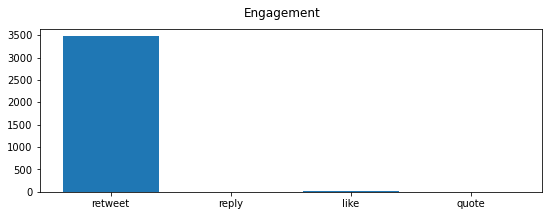

In [42]:
x_plot = ["retweet", "reply", "like", "quote"]
y_plot = [total_retweets, total_reply, total_like, total_quote]

fig, axs = plt.subplots(figsize=(9, 3), sharey=True)
axs.bar(x_plot, y_plot)
fig.suptitle('Engagement')

In [43]:
print(total_retweets, total_reply, total_like, total_quote)

3472 2 14 0


In [54]:
def getFollwersOfMostRetweetUser(user_tweets, retweet_count):
    index_max = retweet_count.index(max(retweet_count))
    user_with_most_retweets = user_tweets[index_max].split(" ")
    id_user_with_most_retweets = user_with_most_retweets[0]    
    
    followers = client.get_users_followers(int(id_user_with_most_retweets), max_results=1000)[0]
    if(followers == None):
        user_tweets.pop(index_max)
        retweet_count.pop(index_max)
        getFollwersOfMostRetweetUser(user_tweets, retweet_count)
    
    
    return (max(retweet_count), len(followers), user_with_most_retweets)

max_retweets, followers_count, user_most_retweets = getFollwersOfMostRetweetUser(user_tweets, retweet_count)

In [55]:
print(max_retweets, followers_count)

245 707


<BarContainer object of 2 artists>

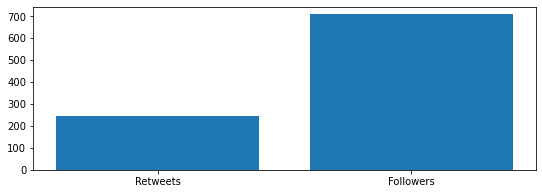

In [56]:
x_user_most_retweets = ['Retweets', 'Followers']
y_user_most_retweets = [max_retweets, followers_count]

fig, axs = plt.subplots(figsize=(9, 3), sharey=True)
axs.bar(x_user_most_retweets, y_user_most_retweets)

In [57]:
print(user_most_retweets[1:])

['RT', '@LuizCor24841840:', '93', 'mortos,', '26', 'desaparecidos', 'e', '6', 'mil', 'desabrigados', 'e', 'o', 'prefeito', 'de', 'Recife', 'em', 'São', 'Paulo', 'em', 'reuniões', 'da', 'campanha', 'de', 'Lula', 'l…']


In [39]:
oauth2_user_handler = tweepy.OAuth2UserHandler(client_id=CLIENT_ID, redirect_uri=REDIRECT_URI, scope=['tweet.read', 'users.read', 'offline.access'])

print(oauth2_user_handler.get_authorization_url())

https://twitter.com/i/oauth2/authorize?response_type=code&client_id=UXJWX3BWbUpqRUdQSjNxeFVzb1c6MTpjaQ&redirect_uri=https%3A%2F%2Fdata-api.twitter.com%2Finsights%2Fengagement&scope=tweet.read+users.read+offline.access&state=LqYI37EaVbwDRlhzzWMXEDjFlKtk3X&code_challenge=XljLYsFKm5JQW6dpRCk1xOz3I5qpwyxm8rTt48pt6ns&code_challenge_method=S256


In [40]:
# full_url = input("Paste in the full URL after you authorized your App: ")
# access_token_auth = oauth2_user_handler.fetch_token(full_url)
# access_auth = access_token_auth['access_token']

In [58]:
oauth1_user_handler = tweepy.OAuth1UserHandler(
    API_KEY, API_SECRET,
    callback=REDIRECT_URI
)

In [59]:
print(oauth1_user_handler.get_authorization_url(signin_with_twitter=True))

https://api.twitter.com/oauth/authenticate?oauth_token=xEZBFgAAAAABcrNaAAABghQ0kwo
